In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 讀取資料
df_train = pd.read_csv('horse_train.csv')
df_train

,horse_id_1,short_1,mile_1,medium_1,long_1,front_1,with-pace_1,off-pace_1,stretch_1,grass_1,...,off-pace_2,stretch_2,grass_2,dirt_2,speed_2,stamina_2,power_2,spirit_2,intelligence_2,value
0,0,E,C,A,B,F,A,A,F,A,...,A,F,A,G,0.0,0.0,20.0,0.0,10.0,0
1,0,E,C,A,B,F,A,A,F,A,...,A,G,A,G,10.0,0.0,20.0,0.0,0.0,17
2,0,E,C,A,B,F,A,A,F,A,...,B,A,A,G,0.0,20.0,10.0,0.0,0.0,19
3,0,E,C,A,B,F,A,A,F,A,...,F,G,A,G,20.0,0.0,0.0,0.0,10.0,14
4,0,E,C,A,B,F,A,A,F,A,...,A,C,A,G,0.0,20.0,0.0,0.0,10.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,20,G,D,A,B,E,A,B,F,A,...,E,G,A,G,10.0,0.0,0.0,20.0,0.0,17
437,20,G,D,A,B,E,A,B,F,A,...,D,F,A,E,0.0,20.0,0.0,0.0,10.0,19
438,20,G,D,A,B,E,A,B,F,A,...,A,B,G,A,0.0,0.0,10.0,20.0,0.0,3
439,20,G,D,A,B,E,A,B,F,A,...,B,E,A,F,0.0,0.0,0.0,10.0,20.0,17


In [3]:
df_train = df_train.drop(['horse_id_1','horse_id_2'],axis = 1)
for h in df_train.keys():
    typeshort_1 =df_train[h]
    
    for i in typeshort_1:
        if i == 'G':
            row =  df_train[h] == 'G'
            df_train.loc[row,h] = 1
        elif i =='F':
            row =  df_train[h] == 'F'
            df_train.loc[row,h] = 2
        elif i == 'E':
            row =  df_train[h] == 'E'
            df_train.loc[row,h] = 3
        elif i == 'D':
            row =  df_train[h] == 'D'
            df_train.loc[row,h] = 4
        elif i == 'C':
            row =  df_train[h] == 'C'
            df_train.loc[row,h] = 5
        elif i =='B':
            row =  df_train[h] == 'B'
            df_train.loc[row,h] = 6
        elif i =='A':
            row =  df_train[h] == 'A'
            df_train.loc[row,h] = 7
        else:
            pass

df_train[['short_1','short_2',
           'mile_1','mile_2',
           'medium_1','medium_2',
           'long_1','long_2',
           'front_1','front_2',
           'with-pace_1','with-pace_2',
           'off-pace_1','off-pace_2',
           'stretch_1','stretch_2',
           'grass_1','grass_2',
           'dirt_1','dirt_2',
           ]] = df_train[['short_1','short_2',
           'mile_1','mile_2',
           'medium_1','medium_2',
           'long_1','long_2',
           'front_1','front_2',
           'with-pace_1','with-pace_2',
           'off-pace_1','off-pace_2',
           'stretch_1','stretch_2',
           'grass_1','grass_2',
           'dirt_1','dirt_2',]].astype(int)      
                          
#把各個屬性作加權
#屬性加成
df_train['speed_total'] = df_train['speed_1']+df_train['speed_2']
df_train['stamina_total'] = df_train['stamina_1']+df_train['stamina_2']
df_train['power_total'] = df_train['power_1']+df_train['power_2']
df_train['spirit_total'] = df_train['spirit_1']+df_train['spirit_2']
df_train['intelligence_total'] = df_train['intelligence_1']+df_train['intelligence_2']

df_train = df_train.drop(['speed_1','speed_2'
               ,'stamina_1','stamina_2'
               ,'power_1','power_2'
               ,'spirit_1','spirit_2'
               ,'intelligence_1','intelligence_2'],axis = 1)
#適性加成
df_train['short_total'] = df_train['short_1']+df_train['short_2']
df_train['mile_total'] = df_train['mile_1']+df_train['mile_2']
df_train['medium_total'] = df_train['medium_1']+df_train['medium_2']
df_train['long_total'] = df_train['long_1']+df_train['long_2']
df_train['front_total'] = df_train['front_1']+df_train['front_2']
df_train['with-pace_total'] = df_train['with-pace_1']+df_train['with-pace_2']
df_train['off-pace_total'] = df_train['off-pace_1']+df_train['off-pace_2']
df_train['stretch_total'] = df_train['stretch_1']+df_train['stretch_2']
df_train['grass_total'] = df_train['grass_1']+df_train['grass_2']
df_train['dirt_total'] = df_train['dirt_1']+df_train['dirt_2']

df_train = df_train.drop(['short_1','short_2'
               ,'mile_1','mile_2'
               ,'medium_1','medium_2'
               ,'long_1','long_2'
               ,'front_1','front_2'
               ,'with-pace_1','with-pace_2'
               ,'off-pace_1','off-pace_2'
               ,'stretch_1','stretch_2'
               ,'grass_1','grass_2'
               ,'dirt_1','dirt_2'],axis = 1)



In [4]:
# 找這個表裡是否有空值
df_train[df_train.isnull().T.any()]

,value,speed_total,stamina_total,power_total,spirit_total,intelligence_total,short_total,mile_total,medium_total,long_total,front_total,with-pace_total,off-pace_total,stretch_total,grass_total,dirt_total


In [5]:
# 觀察資料狀態
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   value               441 non-null    int64  
 1   speed_total         441 non-null    float64
 2   stamina_total       441 non-null    float64
 3   power_total         441 non-null    float64
 4   spirit_total        441 non-null    float64
 5   intelligence_total  441 non-null    float64
 6   short_total         441 non-null    int32  
 7   mile_total          441 non-null    int32  
 8   medium_total        441 non-null    int32  
 9   long_total          441 non-null    int32  
 10  front_total         441 non-null    int32  
 11  with-pace_total     441 non-null    int32  
 12  off-pace_total      441 non-null    int32  
 13  stretch_total       441 non-null    int32  
 14  grass_total         441 non-null    int32  
 15  dirt_total          441 non-null    int32  
dtypes: float

In [6]:
# 找出feature
df_train.keys()

Index(['value', 'speed_total', 'stamina_total', 'power_total', 'spirit_total',
       'intelligence_total', 'short_total', 'mile_total', 'medium_total',
       'long_total', 'front_total', 'with-pace_total', 'off-pace_total',
       'stretch_total', 'grass_total', 'dirt_total'],
      dtype='object')

In [7]:
#計算各個column間的統計數值
#df_train.colum()

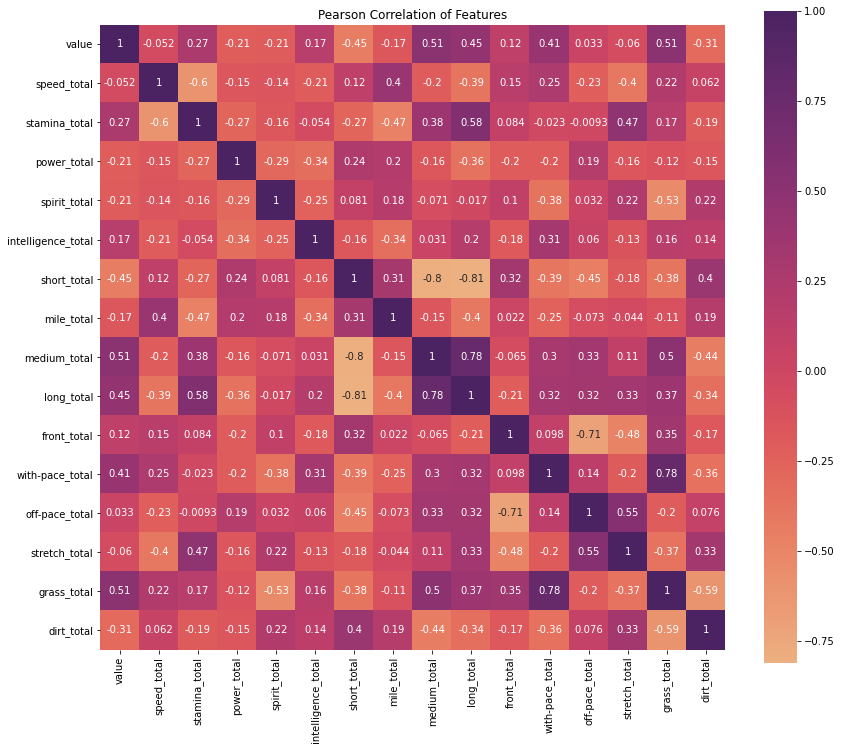

In [8]:
# 先設定畫布大小
_ , ax = plt.subplots(figsize =(14, 12))

# corr 可以算出各 feature 間的相關性數值
df_corr = df_train.corr()

# 用 heatmap 可以把數值用顏色來呈現
# cmap可以設定熱力圖的顏色
# 用這種方式來看 feature 間的相關性會比較方便、快速
sns.heatmap(df_corr, cmap = "flare", square=True, ax=ax, annot=True)

# 使用.title() 將圖表命名
plt.title('Pearson Correlation of Features')
plt.show()
# 顏色越深相關係數越高

In [9]:
# 取相關係數 > 0.3的feature
high_corr = df_corr.index[abs(df_corr["value"])>0.3]
#abs是取絕對值的意思
#abs(trian_corr["count"])>0.3 這句的意思是與SalePrice有關的係數>0.6的判別式，它會輸出True(大於0.6)或是False
#abs(trian_corr["count"])>0.3 會丟回一堆True和False，放在原本的df_corr.index[]就會把是大於0.6的傳回去
print(high_corr) 

Index(['value', 'short_total', 'medium_total', 'long_total', 'with-pace_total',
       'grass_total', 'dirt_total'],
      dtype='object')
